#### Generating image label pairs using SynthSeg
In this tutorial, we will demonstrate generation of (image, label) pairs from a SynthSeg generator.

In [9]:
!pip install nobrainer

In [10]:
import nobrainer

#### Sample data
Here, we download 10 T1-weighted brain scans and their corresponding FreeSurfer segmentations. These volumes take up about 46 MB and are saved to a temporary directory. The returned string csv_path is the path to a CSV file, each row of which contains the paths to a pair of features and labels volumes.

In [11]:
csv_path = nobrainer.utils.get_data()
filepaths = nobrainer.io.read_csv(csv_path)
!cat {csv_path}

features,labels
/tmp/nobrainer-data/datasets/sub-01_t1.mgz,/tmp/nobrainer-data/datasets/sub-01_aparc+aseg.mgz
/tmp/nobrainer-data/datasets/sub-02_t1.mgz,/tmp/nobrainer-data/datasets/sub-02_aparc+aseg.mgz
/tmp/nobrainer-data/datasets/sub-03_t1.mgz,/tmp/nobrainer-data/datasets/sub-03_aparc+aseg.mgz
/tmp/nobrainer-data/datasets/sub-04_t1.mgz,/tmp/nobrainer-data/datasets/sub-04_aparc+aseg.mgz
/tmp/nobrainer-data/datasets/sub-05_t1.mgz,/tmp/nobrainer-data/datasets/sub-05_aparc+aseg.mgz
/tmp/nobrainer-data/datasets/sub-06_t1.mgz,/tmp/nobrainer-data/datasets/sub-06_aparc+aseg.mgz
/tmp/nobrainer-data/datasets/sub-07_t1.mgz,/tmp/nobrainer-data/datasets/sub-07_aparc+aseg.mgz
/tmp/nobrainer-data/datasets/sub-08_t1.mgz,/tmp/nobrainer-data/datasets/sub-08_aparc+aseg.mgz
/tmp/nobrainer-data/datasets/sub-09_t1.mgz,/tmp/nobrainer-data/datasets/sub-09_aparc+aseg.mgz
/tmp/nobrainer-data/datasets/sub-10_t1.mgz,/tmp/nobrainer-data/datasets/sub-10_aparc+aseg.mgz


In [12]:
import matplotlib.pyplot as plt
import nibabel as nib

from nilearn import plotting

from nobrainer.processing.brain_generator import BrainGenerator

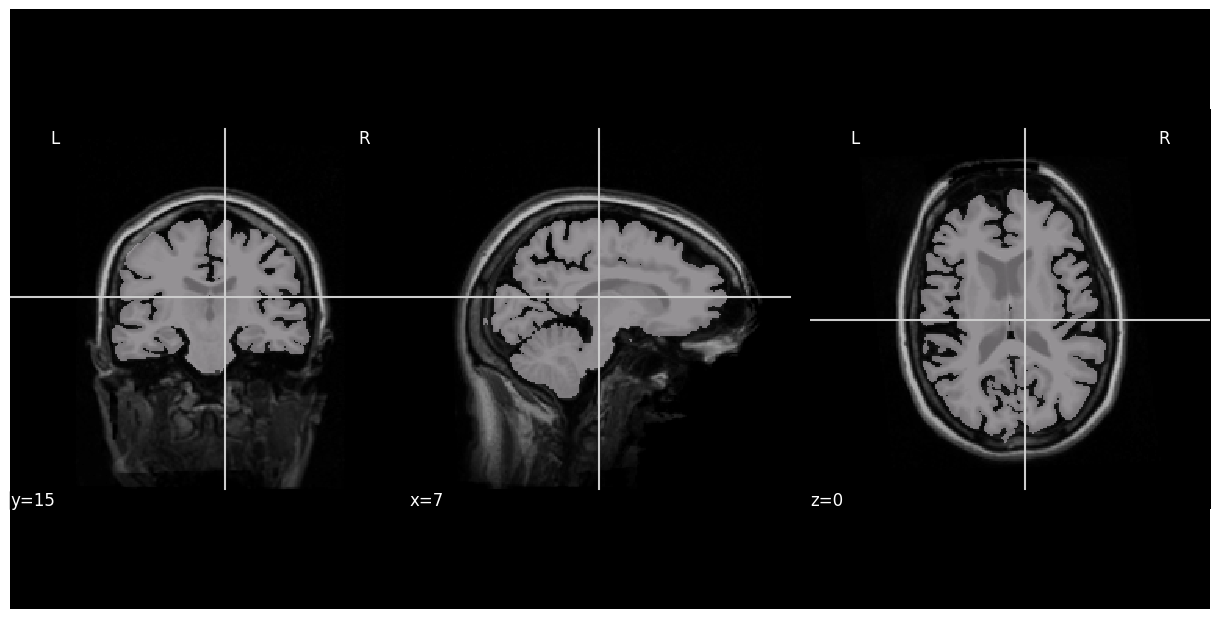

In [13]:
fig = plt.figure(figsize=(12, 6))
plotting.plot_roi(filepaths[0][1], bg_img=filepaths[0][0], alpha=0.4, vmin=0, vmax=1.5, figure=fig)

#### Generate an image from the label map.

In [14]:
brain_generator = BrainGenerator(
    filepaths[0][1],
    randomise_res=False,
)
im, lab = brain_generator.generate_brain()

Compiling list of unique labels
processing 1/1
1/1 [==============================] - 5s 5s/step


#### Convert the generated (image, label) pairs to nifti objects

In [15]:
image = nib.nifti1.Nifti1Image(im, brain_generator.aff, header=brain_generator.header)
label = nib.nifti1.Nifti1Image(lab, brain_generator.aff, header=brain_generator.header)

#### Visualize the generate (image, labels) pair

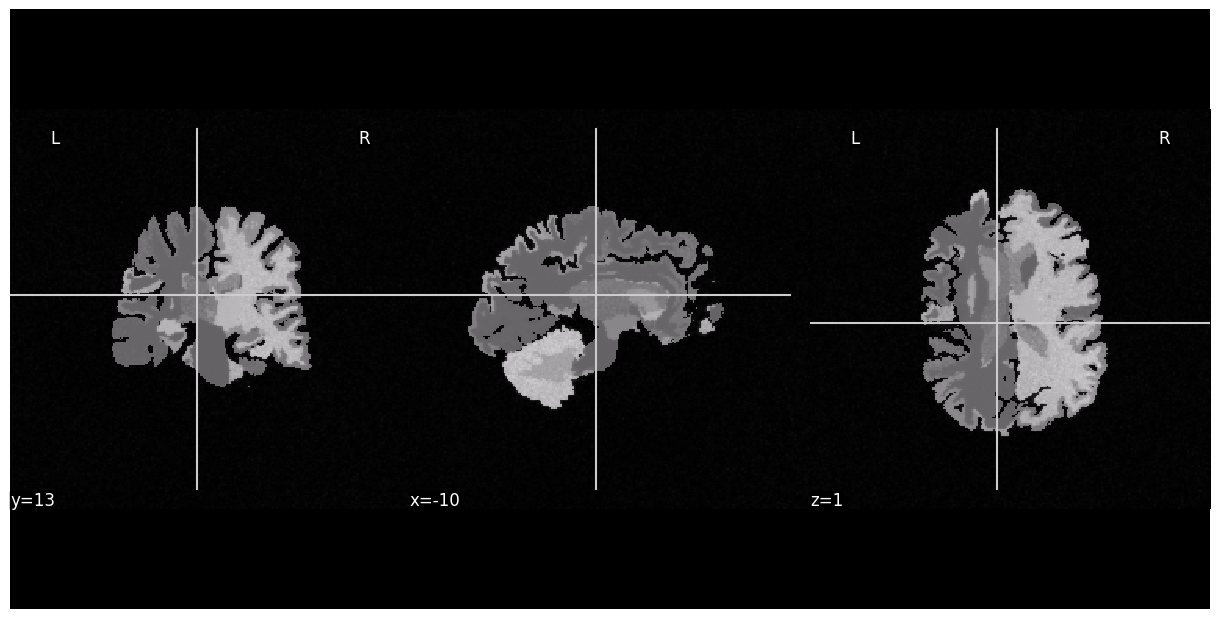

In [16]:
fig = plt.figure(figsize=(12, 6))
plotting.plot_roi(label, bg_img=image, alpha=0.4, vmin=0, vmax=1.5, figure=fig)

#### Save the (image, label) pair for downstream purposes

In [17]:
nib.save(image, "/tmp/image.nii.gz")
nib.save(label, "/tmp/label.nii.gz")

print('Success')

Success


Additional information about SynthSeg and related parameters for the brain generation can be found at https://github.com/BBillot/SynthSeg